In [4]:
library(tidyverse)
library(carat)

In [7]:
ames <- ames <- AmesHousing::make_ames()

In [9]:
index <- sample(1:dim(ames)[1], 0.7*dim(ames)[1])
ames_train <- ames[index,]
ames_test <- ames[-index,]
dim(ames_train) ; dim(ames_test)

[1] 2051   81

[1] 879  81

### 회귀 조건
1. 독립적인 관측값
2. 잔차는 평균이 0이고 분산이 일정합니다.
3. 잔차는 정규 분포를 따른다.

### 단순 선형회귀

In [10]:
model1 <- lm(Sale_Price ~ Gr_Liv_Area, data = ames_train)

In [11]:
summary(model1)


Call:
lm(formula = Sale_Price ~ Gr_Liv_Area, data = ames_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-489169  -29901   -1282   23027  324187 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11764.895   3883.159    3.03  0.00248 ** 
Gr_Liv_Area   112.975      2.462   45.89  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55710 on 2049 degrees of freedom
Multiple R-squared:  0.5069,	Adjusted R-squared:  0.5066 
F-statistic:  2106 on 1 and 2049 DF,  p-value: < 2.2e-16


### 평가 척도
1. RMSE

In [13]:
sigma(model1)

[1] 55708.42

2. MSE

In [16]:
sigma(model1)^2

[1] 3103428511

### 계수 추정량의 신뢰구간

In [17]:
confint(model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),4149.5455,19380.2441
Gr_Liv_Area,108.1471,117.8026


### 다중 선형회귀

In [18]:
(model2 <- lm(Sale_Price ~ Gr_Liv_Area + Year_Built, data = ames_train))


Call:
lm(formula = Sale_Price ~ Gr_Liv_Area + Year_Built, data = ames_train)

Coefficients:
(Intercept)  Gr_Liv_Area   Year_Built  
 -2.144e+06    9.681e+01    1.106e+03  


In [19]:
(model2 <- update(model1, . ~ . + Year_Built))


Call:
lm(formula = Sale_Price ~ Gr_Liv_Area + Year_Built, data = ames_train)

Coefficients:
(Intercept)  Gr_Liv_Area   Year_Built  
 -2.144e+06    9.681e+01    1.106e+03  


In [20]:
lm(Sale_Price ~ Gr_Liv_Area + Year_Built + Gr_Liv_Area:Year_Built, data = ames_train)


Call:
lm(formula = Sale_Price ~ Gr_Liv_Area + Year_Built + Gr_Liv_Area:Year_Built, 
    data = ames_train)

Coefficients:
           (Intercept)             Gr_Liv_Area              Year_Built  
            -1.399e+05              -1.169e+03               8.827e+01  
Gr_Liv_Area:Year_Built  
             6.420e-01  


In [21]:
model3 <- lm(Sale_Price ~ ., data = ames_train) 

#### ```broom::tidy()```

In [23]:
broom::tidy(model3) %>% head

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8836508.5992,10658068.004,-0.82909103,0.4071653
MS_SubClassOne_Story_1945_and_Older,3381.6607,3482.195,0.97112916,0.3316173
MS_SubClassOne_Story_with_Finished_Attic_All_Ages,-694.2999,14754.602,-0.04705649,0.9624735
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages,6261.2499,13617.580,0.45979169,0.6457225
MS_SubClassOne_and_Half_Story_Finished_All_Ages,5382.4681,6492.882,0.82897976,0.4072282
MS_SubClassTwo_Story_1946_and_Newer,1947.1492,5468.404,0.35607266,0.7218288


### 모델 정확도 평가

In [65]:
set.seed(123)

cv_model1 <- caret::train(
  form = Sale_Price ~ Gr_Liv_Area, 
  data = ames_train, 
  method = "lm",
  trControl = trainControl(method = "cv", number = 10)
)

In [66]:
attributes(cv_model1)

$names
 [1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"     

$class
[1] "train"         "train.formula"

In [67]:
cv_model1

Linear Regression 

2051 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1845, 1846, 1845, 1846, 1846, 1847, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  55773.86  0.5153541  38368.52

Tuning parameter 'intercept' was held constant at a value of TRUE

In [68]:
set.seed(123)
cv_model2 <- train(
  Sale_Price ~ Gr_Liv_Area + Year_Built, 
  data = ames_train, 
  method = "lm",
  trControl = trainControl(method = "cv", number = 10)
)

In [69]:
set.seed(123)
cv_model3 <- train(
  Sale_Price ~ ., 
  data = ames_train, 
  method = "lm",
  trControl = trainControl(method = "cv", number = 10)
)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFi

In [70]:
summary(resamples(list(
  model1 = cv_model1, 
  model2 = cv_model2, 
  model3 = cv_model3
)))


Call:
summary.resamples(object = resamples(list(model1 = cv_model1, model2
 = cv_model2, model3 = cv_model3)))

Models: model1, model2, model3 
Number of resamples: 10 

MAE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
model1 33859.67 36123.14 38176.71 38368.52 40349.48 44515.09    0
model2 28200.76 29338.34 31349.41 31271.40 33371.43 34085.43    0
model3 13379.28 14573.73 15902.75 16050.15 16752.36 19650.16    0

RMSE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
model1 49431.80 52717.13 54592.49 55773.86 57167.86 69232.51    0
model2 40230.74 42247.59 44840.23 45698.10 47825.71 54780.39    0
model3 19547.20 24111.03 29641.79 32570.81 37785.89 54727.54    0

Rsquared 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
model1 0.2274311 0.5031288 0.5283001 0.5153541 0.5956494 0.6128678    0
model2 0.4682431 0.6570457 0.6960473 0.6706839 0.7176057 0.7399255    0
model3 0.6111147 0.7742124 0.8811227 0.8299415 0.9065532 0.932

### 모델 문제
- 선형회귀의 가정

#### 1. 선형관계 
- 선형 회귀는 예측 변수와 응답 변수 간의 선형 관계를 가정합니다. 그러나 비선형 관계는 종종 변수에 변환을 적용하여 거의 선형으로 변경할 수 있다.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using formula 'y ~ x'



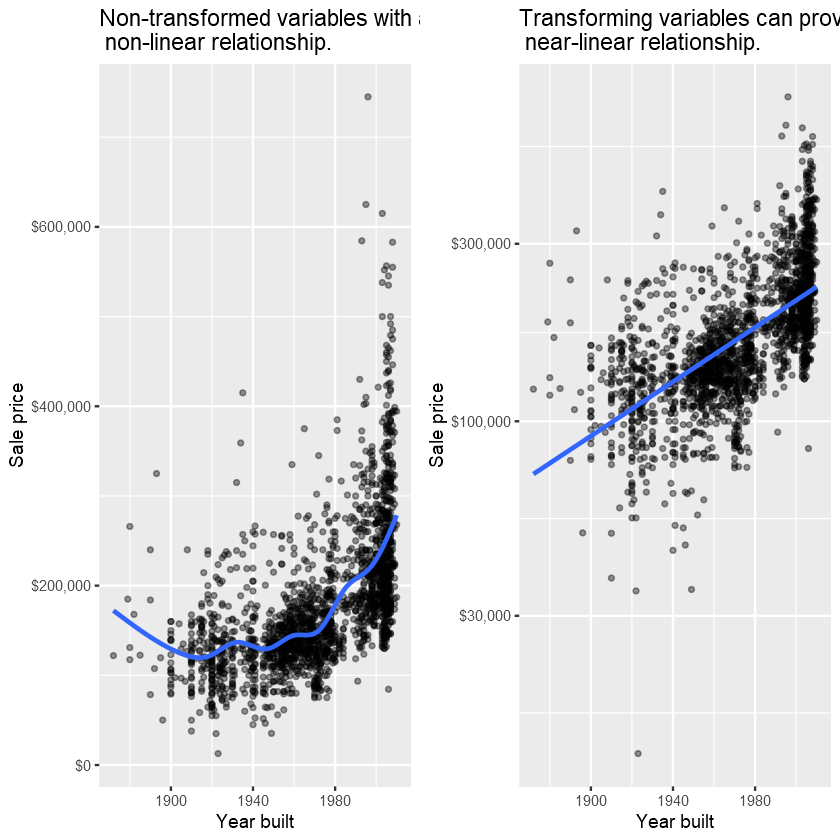

In [71]:
p1 <- ggplot(ames_train, aes(Year_Built, Sale_Price)) + 
  geom_point(size = 1, alpha = .4) +
  geom_smooth(se = FALSE) +
  scale_y_continuous("Sale price", labels = scales::dollar) +
  xlab("Year built") +
  ggtitle(paste("Non-transformed variables with a\n",
                "non-linear relationship."))

p2 <- ggplot(ames_train, aes(Year_Built, Sale_Price)) + 
  geom_point(size = 1, alpha = .4) + 
  geom_smooth(method = "lm", se = FALSE) +
  scale_y_log10("Sale price", labels = scales::dollar) +
  xlab("Year built") +
  ggtitle(paste("Transforming variables can provide a\n",
                "near-linear relationship."))

gridExtra::grid.arrange(p1, p2, nrow = 1)

#### 2. 잔차의 등분산성
- 오차 분산이 일정하지 않으면 계수에 대한 p 값 과 신뢰 구간이 유효하지 않다.

#### ```broom::augment()``` : 모델 결과를 각 관측치(예: 예측값, 잔차)에 쉽게 추가

In [72]:
df1 <- broom::augment(cv_model1$finalModel, data = ames_train)
df1 %>% head

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude,.fitted,.hat,.sigma,.cooksd,.std.resid
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Split_or_Multilevel,Residential_Low_Density,65,14149,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,WD,Normal,165000,-93.67442,42.03319,126999.3,0.0009303318,55715.69,2.168495e-04,0.68245368
One_Story_1945_and_Older,Residential_Low_Density,60,10800,Pave,Gravel,Regular,Lvl,AllPub,Inside,...,WD,Normal,64500,-93.61242,42.03578,121124.6,0.0010323147,55707.96,5.343766e-04,-1.01697054
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,9658,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,WD,Normal,255900,-93.65048,42.05920,193202.5,0.0005111193,55704.79,3.240368e-04,1.12574502
One_Story_1945_and_Older,Residential_Medium_Density,0,5890,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,WD,Normal,120500,-93.62529,42.02252,103952.4,0.0013909681,55720.82,6.153536e-05,0.29724635
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,78,10140,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,WD,Normal,165000,-93.63143,42.05267,164281.0,0.0005292915,55722.02,4.413322e-08,0.01291027
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,60,8400,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,WD,Normal,82000,-93.67908,42.03654,106776.8,0.0013257792,55719.33,1.314744e-04,-0.44505311


Warning message:
"Removed 20 rows containing missing values (geom_point)."


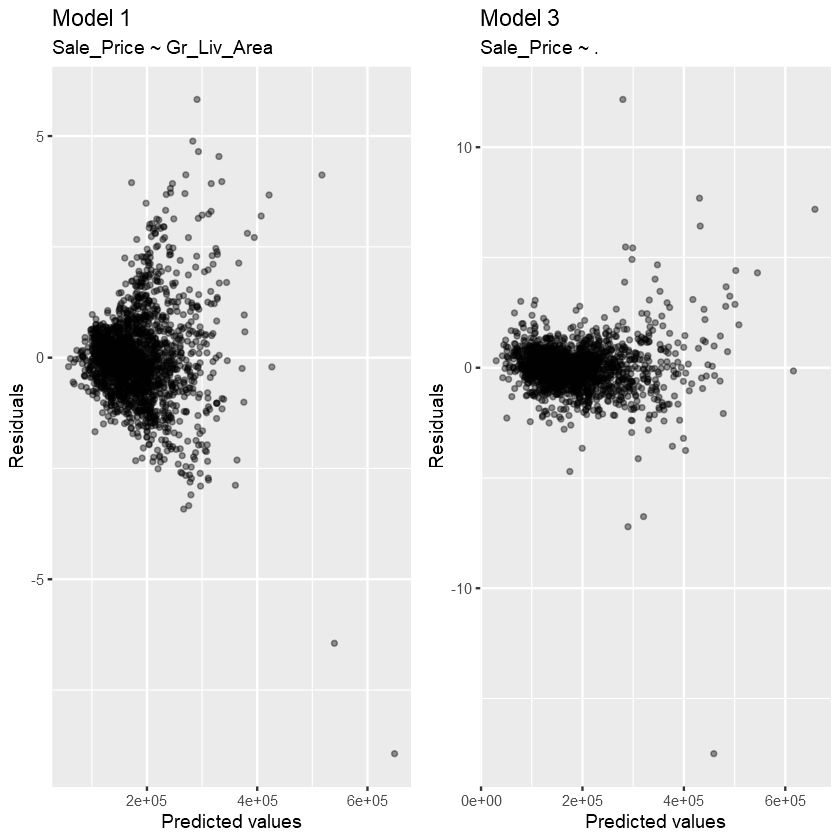

In [73]:
p1 <- ggplot(df1, aes(.fitted, .std.resid)) + 
  geom_point(size = 1, alpha = .4) +
  xlab("Predicted values") +
  ylab("Residuals") +
  ggtitle("Model 1", subtitle = "Sale_Price ~ Gr_Liv_Area")

df2 <- broom::augment(cv_model3$finalModel, data = ames_train)

p2 <- ggplot(df2, aes(.fitted, .std.resid)) + 
  geom_point(size = 1, alpha = .4)  +
  xlab("Predicted values") +
  ylab("Residuals") +
  ggtitle("Model 3", subtitle = "Sale_Price ~ .")

gridExtra::grid.arrange(p1, p2, nrow = 1)

- 선형 회귀는 잔차 간의 일정한 분산을 가정
- model1(왼쪽)은 이분산성의 결정적인 징후를 보여주는 반면 model3(오른쪽)은 일정한 분산을 갖는 것으로 보임.

#### 3. 잔차의 독립성
- 선형 회귀는 오차가 독립적이고 상관 관계가 없다고 가정
- 실제로 오차 간에 상관 관계가 있는 경우 계수의 추정된 표준편차가 편향되어 예측 구간이 예상보다 좁게된다

In [74]:
df1 <- mutate(df1, id = row_number())
df2 <- mutate(df2, id = row_number())
df1 %>% head 

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Sale_Condition,Sale_Price,Longitude,Latitude,.fitted,.hat,.sigma,.cooksd,.std.resid,id
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Split_or_Multilevel,Residential_Low_Density,65,14149,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Normal,165000,-93.67442,42.03319,126999.3,0.0009303318,55715.69,2.168495e-04,0.68245368,1
One_Story_1945_and_Older,Residential_Low_Density,60,10800,Pave,Gravel,Regular,Lvl,AllPub,Inside,...,Normal,64500,-93.61242,42.03578,121124.6,0.0010323147,55707.96,5.343766e-04,-1.01697054,2
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,9658,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Normal,255900,-93.65048,42.05920,193202.5,0.0005111193,55704.79,3.240368e-04,1.12574502,3
One_Story_1945_and_Older,Residential_Medium_Density,0,5890,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,Normal,120500,-93.62529,42.02252,103952.4,0.0013909681,55720.82,6.153536e-05,0.29724635,4
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,78,10140,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Normal,165000,-93.63143,42.05267,164281.0,0.0005292915,55722.02,4.413322e-08,0.01291027,5
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,60,8400,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Normal,82000,-93.67908,42.03654,106776.8,0.0013257792,55719.33,1.314744e-04,-0.44505311,6


Warning message:
"Removed 20 rows containing missing values (geom_point)."


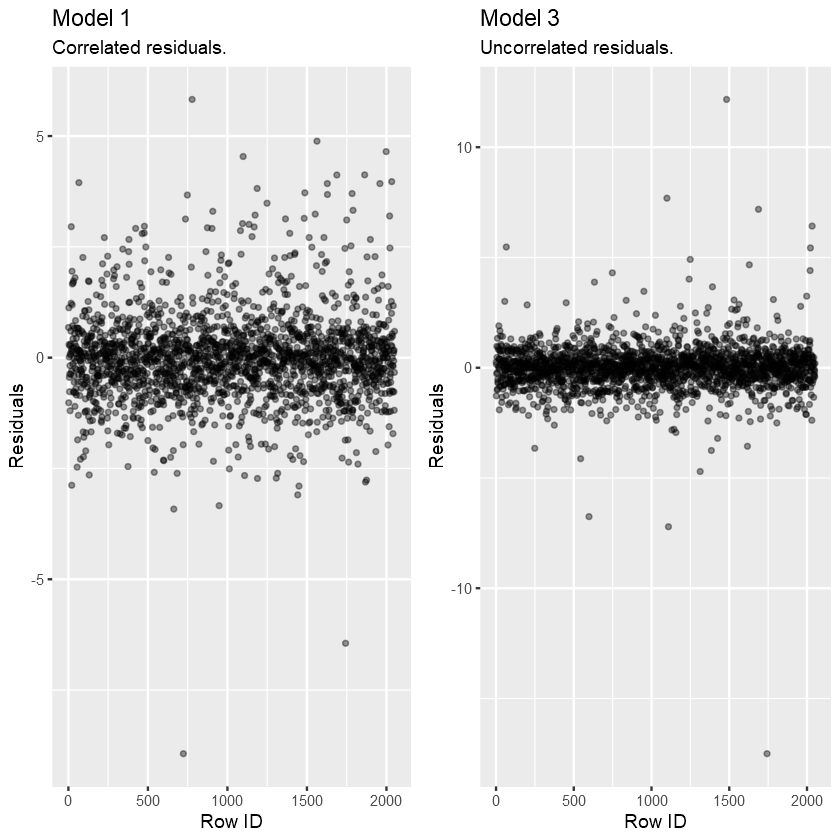

In [75]:
p1 <- ggplot(df1, aes(id, .std.resid)) + 
  geom_point(size = 1, alpha = .4) +
  xlab("Row ID") +
  ylab("Residuals") +
  ggtitle("Model 1", subtitle = "Correlated residuals.")

p2 <- ggplot(df2, aes(id, .std.resid)) + 
  geom_point(size = 1, alpha = .4) +
  xlab("Row ID") +
  ylab("Residuals") +
  ggtitle("Model 3", subtitle = "Uncorrelated residuals.")

gridExtra::grid.arrange(p1, p2, nrow = 1)

- 선형 회귀는 상관되지 않은 오류를 가정. model1(왼쪽) 의 잔차는 ϵ1에 대한 정보를 제공
- 반면 model3자기 상관의 징후는 없음.

#### 4. 변수보다 더 많은 관측값 (n > p)

#### 5. 다중공선성
- 공선 성은 둘 이상의 예측변수가 서로 밀접하게 관련된 상황을 나타냄
- 다중공선성으로 인해 예측 변수가 실제로는 유의하지만 통계적으로 유의하지 않은 것으로 나타날 수 있음

- 다중공선성 발생시
1. 모든 쌍별 상관 관계가 미리 결정된 임계값 아래로 떨어질 때까지 문제가 되는 예측 변수를 한 번에 하나씩 수동으로 제거
2. 차원축소

### PCA
### ```method = "pcr"```

1. ```preProcess```거의 0에 가까운 분산 기능을 제거, 수치형 변수를 중심화/축소 
2.  ```method = “pcr”```로 PCA
3. 수치형 변수에 대해 PCA를 수행

In [78]:
set.seed(123)
cv_model_pcr <- train(
  Sale_Price ~ ., 
  data = ames_train, 
  method = "pcr",
  trControl = trainControl(method = "cv", number = 10),
  preProcess = c("zv", "center", "scale"),
  tuneLength = 100
  )

In [85]:
cv_model_pcr$bestTune

,ncomp
,<dbl>
100,100


#### 최소의 RMSE에 도달하는데 100개의 주성분 필요

In [84]:
cv_model_pcr$results %>% filter(ncomp == unlist(cv_model_pcr$bestTune))

ncomp,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,30998.04,0.8453537,19501.17,6290.021,0.07383305,1695.509


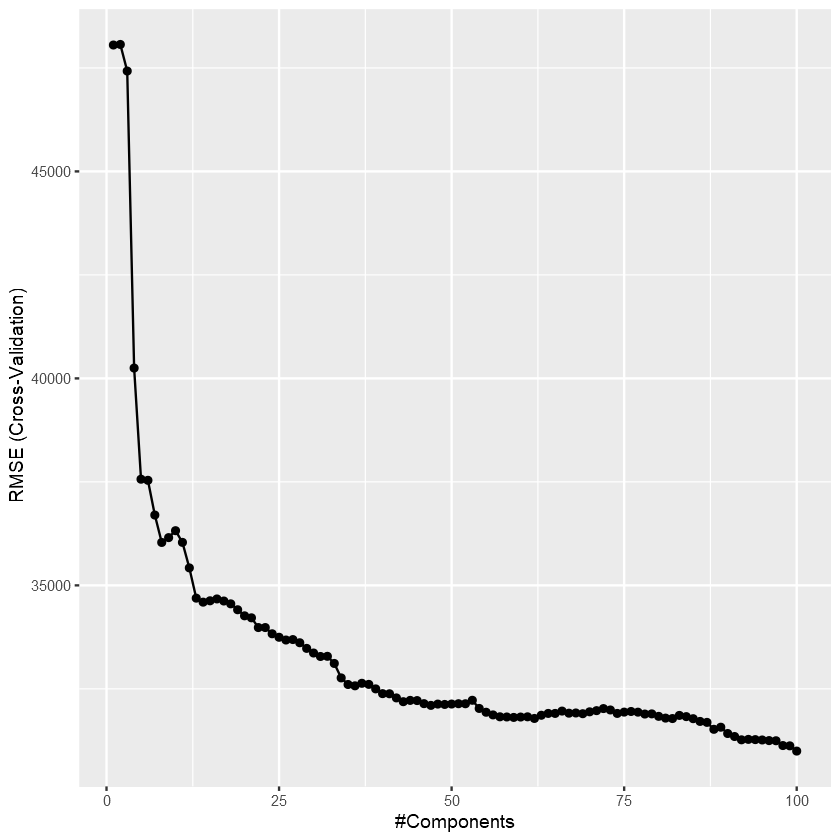

In [86]:
ggplot(cv_model_pcr)

### PLS
- PCR과 유사하게,회귀를 위한 입력의 선형 조합 세트도 구성하지만 
- PCR과 달리 반응 변수를 사용하여 주성분 구성을 도움
- ***PLS는 원래 기능에서 대부분의 정보를 캡처할 뿐만 아니라 응답과 관련된 새로운 기능을 찾는 지도 차원 축소 절차로 생각할 수 있다.***

<img src = "https://bradleyboehmke.github.io/HOML/images/pls-vs-pcr.png">

### ```method = "pls"```

In [88]:
set.seed(123)
cv_model_pls <- train(
  Sale_Price ~ ., 
  data = ames_train, 
  method = "pls",
  trControl = trainControl(method = "cv", number = 10),
  preProcess = c("zv", "center", "scale"),
  tuneLength = 30
)

In [89]:
cv_model_pls$bestTune

,ncomp
,<dbl>
5,5


In [91]:
cv_model_pls$results %>% filter(ncomp == unlist(cv_model_pls$bestTune))

ncomp,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,28625.95,0.8643474,17192.72,7195.284,0.08412888,1442.629


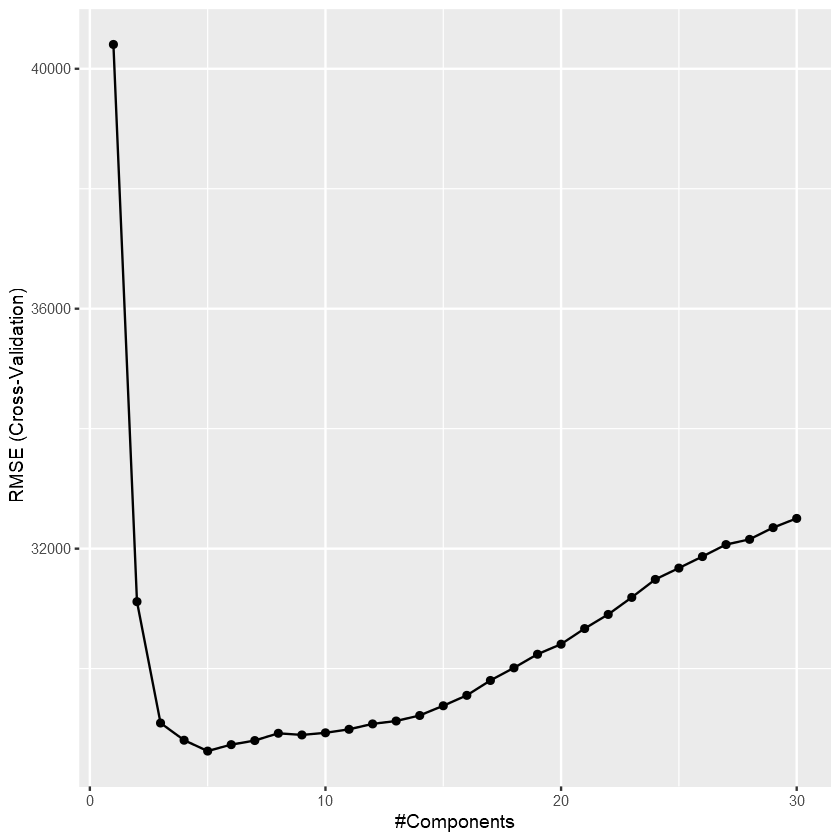

In [92]:
ggplot(cv_model_pls)

### 변수 중요도
- 선형 회귀 모델의 경우 사용된 각 모델 매개변수에 대한 t -통계량 의 절대값으로 가장 자주 측정됨
-  PLS 모델의 경우 절대 회귀 계수의 가중치 합을 사용하여 변수 중요도를 계산
- 가중치는 PLS 구성 요소 수에 대한 RSS 감소의 함수이며 각 결과에 대해 별도로 계산됨. 따라서 계수의 기여도는 RSS 감소에 비례하여 가중됨

### ```vip::vip()```

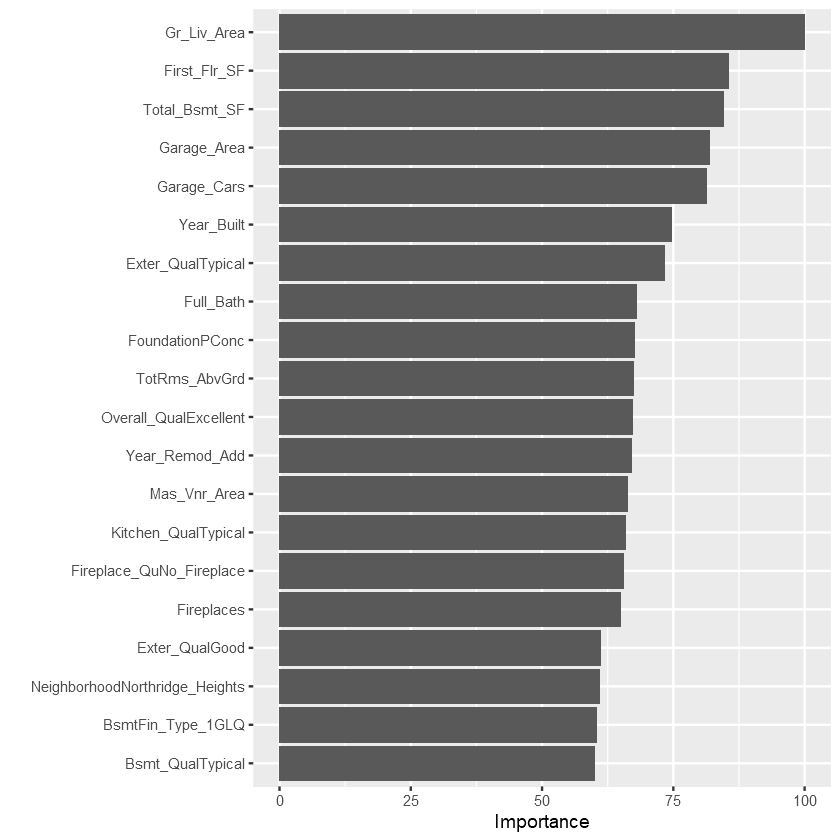

In [95]:
library(vip)
vip(cv_model_pls, num_features = 20, method = "model")

### PDP :  partial dependence plots
- PDP는 평균 예측값의 변화를 표시
- 선형 회귀 모델은 단조 선형 관계를 가정
- 선형 모델의 경우 PDP의 기울기는 OLS 계수의 해당 기능과 동일

### ```pdp::partial()```

In [97]:
library(pdp)

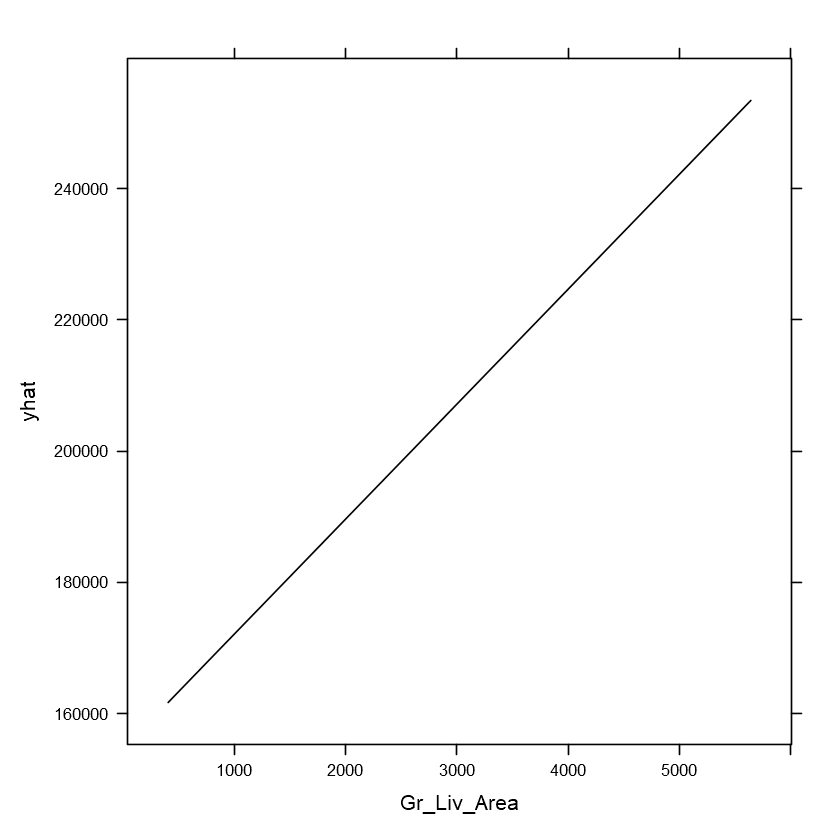

In [98]:
pdp::partial(cv_model_pls, "Gr_Liv_Area", grid.resolution = 20, plot = TRUE)